In [1]:
%load_ext autoreload
%autoreload 2
%cd ..

c:\Users\troosma\Documents\Ylikool\6. semester\Bakatöö\bakatoo


In [325]:
import sys
import os

import numpy as np
import random 
import tensorflow as tf

from tensorflow import keras
from keras import layers

from matplotlib import pyplot as plt

from scripts.CustomCallbacks import CustomLogger, RMSELogger
import scripts.utils as utils
import scripts.Slopes as Slopes

from datetime import datetime

utils.reset_seeds(0)

Epoch:   0 | Loss: 3.94887e-02
Epoch: 100 | Loss: -7.48493e-01
Epoch: 200 | Loss: -7.49942e-01
Epoch: 300 | Loss: -7.50511e-01
Epoch: 400 | Loss: -7.49898e-01
313/313 [==============================] - 1s 2ms/step
model contains 75 breaks
313/313 [==============================] - 1s 3ms/step


<Figure size 640x480 with 0 Axes>

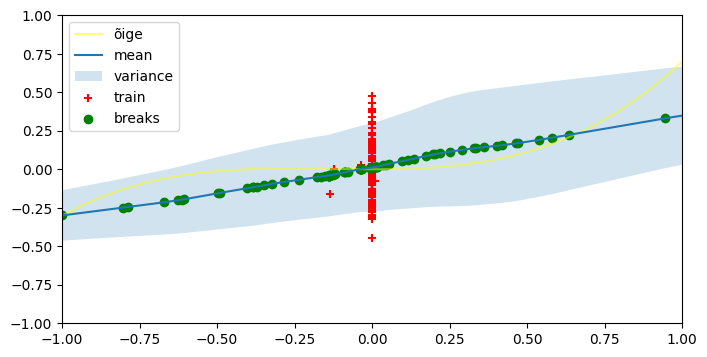

In [98]:
utils.reset_seeds(2002)

model = keras.Sequential([
    layers.Input(shape=(1,)),
    layers.Dense(units=50, activation='relu', name="layer_1"),
    layers.Dense(units=50, activation='relu', name="layer_2"),
    layers.Dense(units=2, activation='linear', name="layer_3")
])

fn = lambda x: 0.5*x**3 + 0.2*x**2
X, y = utils.train_data_maker(
    [(-0.0, 0.00, 100, 0.2),
     (-0.1, 0.1, 5, 0.1)],
    # (0.2, 0.1, 5, 0.1),
    # (0.8, 0.2, 5, 0.2)],
    fn=fn
)

X_train, y_train = X, y
X_valid, y_valid = np.linspace(-1, 1, 10000), fn(np.linspace(-1, 1, 10000))

model.compile(
    optimizer=keras.optimizers.Adam(
       learning_rate=0.0001, amsgrad=True, epsilon=0.01),
    loss=utils.neg_log_likelihood,
)

h = model.fit(X, y, batch_size=8, epochs=500, verbose=0,
                callbacks=[CustomLogger(100)], shuffle=True)


plt.clf()
utils.joonista_variance(model, X_valid, X_train, y_train, xlim=(-1,1), ylim=(-1,1),
                        ground_truth=fn)

In [101]:
X_train

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        , -0.        ,
       -0.        ,  0.        ,  0.        , -0.        ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        , -0.        ,
       -0.        , -0.        ,  0.        , -0.        , -0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        ,  0.        , -0.        ,  0.  

In [100]:
model.weights

[<tf.Variable 'layer_1/kernel:0' shape=(1, 50) dtype=float32, numpy=
 array([[-0.40338224, -0.2022956 ,  0.00379535,  0.28453854,  0.1030345 ,
          0.25032943, -0.04893705,  0.13551925, -0.2405613 , -0.12675253,
          0.13697629, -0.16927472,  0.07850458, -0.22013323, -0.18434131,
         -0.275654  , -0.11448801, -0.27106526,  0.09470662,  0.32594693,
          0.19778204,  0.0943927 , -0.05223495, -0.2617832 , -0.05085585,
         -0.04792197, -0.30360824,  0.28429443,  0.2769595 , -0.24473979,
         -0.3370422 ,  0.08185186,  0.279031  , -0.20374335, -0.30929178,
          0.22417036,  0.20702091,  0.20877318, -0.13234702, -0.03154127,
         -0.1633893 ,  0.10578819, -0.01715637, -0.3183044 , -0.23003942,
         -0.21788311,  0.31100383,  0.1829157 , -0.37047258, -0.13511996]],
       dtype=float32)>,
 <tf.Variable 'layer_1/bias:0' shape=(50,) dtype=float32, numpy=
 array([ 0.10152069,  0.09499928,  0.05123387,  0.00186439,  0.02922774,
         0.09641148, -0.001

313/313 [==============================] - 1s 2ms/step
model contains 2 breaks
313/313 [==============================] - 1s 3ms/step


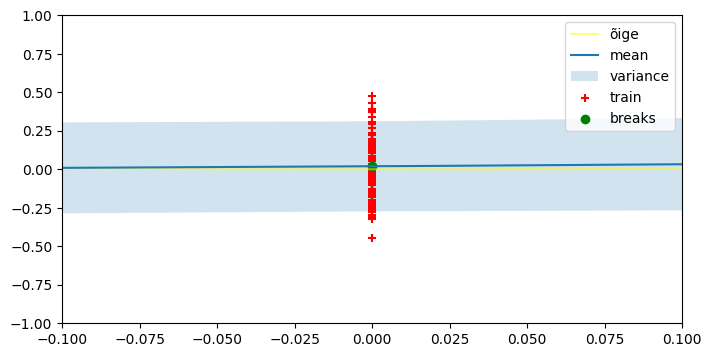

In [63]:
utils.joonista_variance(model, X_valid, X_train, y_train, xlim=(-0.1,0.1), ylim=(-1,1),
                        ground_truth=fn)

In [92]:
# treeningandmete rmse
np.sqrt(np.mean((y_train - 0.019)**2))

0.20694970002558957

In [91]:
def find_rmse_estimate(model, X_train, y_train): # treeningandmetel mitte gridil
    X = X_train
    num = len(X)

    y_pred = model.predict(X)
    variance = np.exp(y_pred[:, 1:])

    return np.sqrt(np.sum(variance)/num)

find_rmse_estimate(model, X_train, 1)

4/4 [==============================] - 0s 2ms/step


0.5419506776052477

In [80]:
np.exp(-1.23)**0.5

0.2922925776808594

In [88]:
-1.23 + ((y_train-0.019)**2)/-1.23

array([-1.33398318, -1.2976928 , -1.29063575, -1.25486405, -1.28229714,
       -1.34113497, -1.23841279, -1.25308065, -1.33866251, -1.29242768,
       -1.33217773, -1.25139166, -1.25973553, -1.33713694, -1.23428525,
       -1.24627625, -1.2536206 , -1.23203268, -1.23876239, -1.25225271,
       -1.23257562, -1.27639328, -1.23134328, -1.27931093, -1.25027374,
       -1.23194621, -1.23914025, -1.33007939, -1.24083802, -1.23317504,
       -1.2543278 , -1.23641813, -1.24924789, -1.23012977, -1.24737028,
       -1.24099397, -1.23754243, -1.23299155, -1.23294651, -1.27590212,
       -1.31182807, -1.23385709, -1.23016706, -1.23948403, -1.40026363,
       -1.25346717, -1.26303108, -1.26396804, -1.2947369 , -1.24007436,
       -1.2308666 , -1.31517181, -1.25293295, -1.25761135, -1.23121704,
       -1.2487086 , -1.26461049, -1.27489314, -1.28020255, -1.23923243,
       -1.24143699, -1.33944741, -1.25374097, -1.2300018 , -1.28670081,
       -1.24826162, -1.26900802, -1.31744225, -1.26885249, -1.23

In [89]:
-3.21 + ((y_train-0.019)**2)/-3.21

array([-3.24984402, -3.23593836, -3.23323426, -3.21952735, -3.23003909,
       -3.25258443, -3.21322359, -3.21884399, -3.25163703, -3.23392089,
       -3.24915222, -3.2181968 , -3.22139399, -3.25105247, -3.21164201,
       -3.21623669, -3.21905088, -3.21077888, -3.21335755, -3.21852674,
       -3.21098692, -3.22777686, -3.21051471, -3.22889484, -3.21776844,
       -3.21074575, -3.21350234, -3.24834818, -3.21415289, -3.2112166 ,
       -3.21932187, -3.21245928, -3.21737536, -3.21004972, -3.2166559 ,
       -3.21421264, -3.21289009, -3.21114629, -3.21112903, -3.22758866,
       -3.24135468, -3.21147795, -3.21006401, -3.21363407, -3.2752412 ,
       -3.21899209, -3.22265677, -3.22301579, -3.23480573, -3.21386027,
       -3.21033206, -3.24263593, -3.21878739, -3.22058005, -3.21046634,
       -3.21716871, -3.22326196, -3.22720204, -3.22923649, -3.21353766,
       -3.2143824 , -3.25193779, -3.21909701, -3.21000069, -3.23172648,
       -3.21699744, -3.224947  , -3.24350591, -3.2248874 , -3.21

In [76]:
y_pred = model.predict(X)
y_pred[:, 1:]

4/4 [==============================] - 0s 2ms/step


array([[-1.2291173],
       [-1.2291173],
       [-1.2291173],
       [-1.2291173],
       [-1.2291173],
       [-1.2291173],
       [-1.2291173],
       [-1.2291173],
       [-1.2291173],
       [-1.2291173],
       [-1.2291173],
       [-1.2291173],
       [-1.2291173],
       [-1.2291173],
       [-1.2291173],
       [-1.2291173],
       [-1.2291173],
       [-1.2291173],
       [-1.2291173],
       [-1.2291173],
       [-1.2291173],
       [-1.2291173],
       [-1.2291173],
       [-1.2291173],
       [-1.2291173],
       [-1.2291173],
       [-1.2291173],
       [-1.2291173],
       [-1.2291173],
       [-1.2291173],
       [-1.2291173],
       [-1.2291173],
       [-1.2291173],
       [-1.2291173],
       [-1.2291173],
       [-1.2291173],
       [-1.2291173],
       [-1.2291173],
       [-1.2291173],
       [-1.2291173],
       [-1.2291173],
       [-1.2291173],
       [-1.2291173],
       [-1.2291173],
       [-1.2291173],
       [-1.2291173],
       [-1.2291173],
       [-1.22

In [66]:
np.var(y_train)

0.04282143182352963

In [59]:
y_pred = model.predict(X)
variance = np.exp(y_pred[:, 1:])
variance

4/4 [==============================] - 0s 2ms/step


array([[0.29267815],
       [0.2929019 ],
       [0.29280698],
       [0.29259998],
       [0.2926612 ],
       [0.293128  ],
       [0.29281166],
       [0.29299238],
       [0.29298452],
       [0.29290015],
       [0.29294392],
       [0.29272896],
       [0.29284266],
       [0.2929476 ],
       [0.29289475],
       [0.29291284],
       [0.2927224 ],
       [0.2930012 ],
       [0.29291618],
       [0.29310778],
       [0.29338685],
       [0.2928603 ],
       [0.29282573],
       [0.2930894 ],
       [0.29259527],
       [0.2932064 ],
       [0.29296005],
       [0.29299825],
       [0.2927161 ],
       [0.29272652],
       [0.29294214],
       [0.29290548],
       [0.29311332],
       [0.29329282],
       [0.2930247 ],
       [0.29294187],
       [0.29276574],
       [0.29277027],
       [0.29303113],
       [0.29301715],
       [0.29313973],
       [0.2932007 ],
       [0.2932477 ],
       [0.29264757],
       [0.2930512 ],
       [0.29303947],
       [0.29317325],
       [0.292

# RMSE leidmine kahel viisil

1. find_rmse(model, start, end, fn, *, step=1/5000):
   1. klassikaline, sqrt((y_true-pred)**2)
2. find_rmse_estimate(model, start, end, *, step=1/5000):
   1. tagastab mudeli variance summa (kahekordse, sest variance on mõlemale poole sama hetkel) 


defaultina võetakse 10000 samplet.


In [5]:
def find_rmse(model, start, end, fn, *, step=1/5000):

    X = np.linspace(start, end, int((end-start)/step))
    y_true = fn(X)

    y_pred = model.predict(X)
    return np.sqrt(np.mean((y_pred[:, 0:1] - y_true)**2))
    # ei ole mean
find_rmse(model, -1, 1, fn=lambda x: 0.5*x**3 + 0.2*x**2)

313/313 [==============================] - 2s 5ms/step


0.38692040323231525

In [45]:
def find_rmse_estimate(model, start, end, *, step=1/5000):
    num = int((end-start)/step)
    X = np.linspace(start, end, num)

    y_pred = model.predict(X)
    variance = np.exp(y_pred[:, 1:])
    # print(variance)
    # print(2*np.sum(variance)/len(X))
    # tempsum = 0
    
    # for v in variance:
    #     tempsum += v*step
    
    # print(2 * tempsum)
    return np.sqrt(np.sum(variance)/num)

find_rmse_estimate(model, -1, 1)

313/313 [==============================] - 0s 1ms/step


0.32294958669562496

# Mitmekordse jooksutamise setup

Eesmärgid:
1. jooksutada samade treeningandmetega, seedi muutes
2. jooksutada erineva sampledusega, seed sama
3. hea naming convention


kõik korraga tehtud jooksud kausta, default: kuupäev.
tekitab .txt koos:
* overview andmetest, mitu punkti, ideepoolest punktide sampleduse kirjeldus
* kirjutatud välja kõik treeningasjad
* seedid
* arhitektuur

.png


In [7]:
def treeni_stuff(seed=0, *, train_data, **kwargs):

    if "epochs" in kwargs:
        epochs = kwargs["epochs"]
    else:
        epochs = 500
    if "batch_size" in kwargs:
        batch_size = kwargs["batch_size"]
    else:
        batch_size = 8
    if "show_diagram" in kwargs:
        show_diagram = kwargs["show_diagram"]
    else:
        show_diagram = False
    if "fn" in kwargs:
        fn = kwargs["fn"]

    utils.reset_seeds(seed)

    model = keras.Sequential([
        layers.Input(shape=(1,)),
        layers.Dense(units=5, activation='relu', name="layer_1"),
        layers.Dense(units=5, activation='relu', name="layer_2"),
        layers.Dense(units=2, activation='linear', name="layer_3")
    ])

    X_train, y_train =  train_data

    model.compile(
        optimizer=keras.optimizers.Adam(
            learning_rate=0.001, amsgrad=True, epsilon=0.01),
        loss=utils.neg_log_likelihood,
    )

    h = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=0,
                  callbacks=[CustomLogger(100)], shuffle=True)

    print(f"done seed{seed}")
    if show_diagram:
        X_valid = np.linspace(-1, 1, 10000)
        utils.joonista_variance(model, X_valid, X_train, y_train, ground_truth=fn)
    return model, h

Epoch:   0 | Loss: -2.88552e-03
Epoch: 100 | Loss: -7.24301e-01
Epoch: 200 | Loss: -9.07533e-01
Epoch: 300 | Loss: -1.07821e+00
Epoch: 400 | Loss: -1.16995e+00
Epoch: 500 | Loss: -1.23457e+00
Epoch: 600 | Loss: -1.28488e+00
Epoch: 700 | Loss: -1.33350e+00
Epoch: 800 | Loss: -1.39289e+00
Epoch: 900 | Loss: -1.44910e+00
done seed0
313/313 [==============================] - 2s 6ms/step
model contains 8 breaks
313/313 [==============================] - 2s 5ms/step
INFO:tensorflow:Assets written to: test/2023-02-21_3/models/seed_0\assets
Epoch:   0 | Loss: 2.49351e-02
Epoch: 100 | Loss: -8.50940e-01
Epoch: 200 | Loss: -1.65597e+00
Epoch: 300 | Loss: -1.75092e+00
Epoch: 400 | Loss: -1.77886e+00
Epoch: 500 | Loss: -1.80662e+00
Epoch: 600 | Loss: -1.82082e+00
Epoch: 700 | Loss: -1.82232e+00
Epoch: 800 | Loss: -1.82933e+00
Epoch: 900 | Loss: -1.83515e+00
done seed0
313/313 [==============================] - 2s 5ms/step
model contains 7 breaks
313/313 [==============================] - 2s 5ms/st

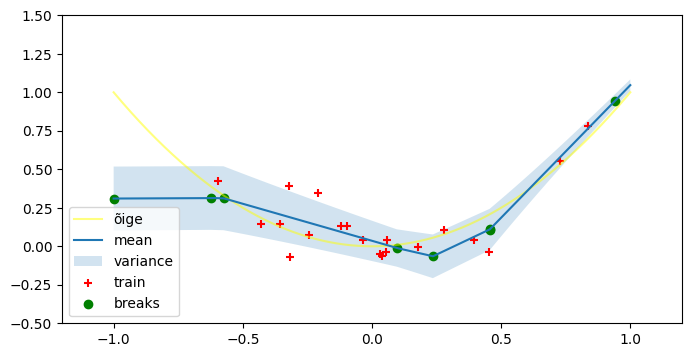

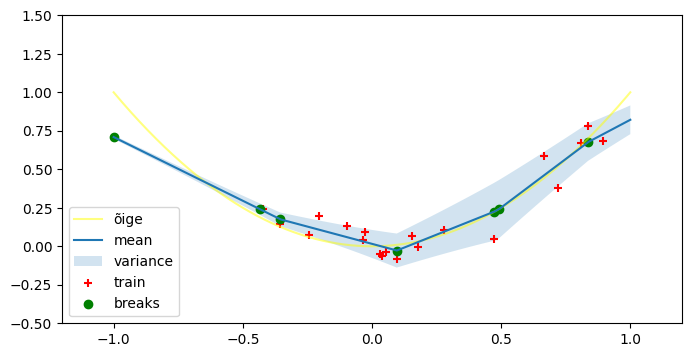

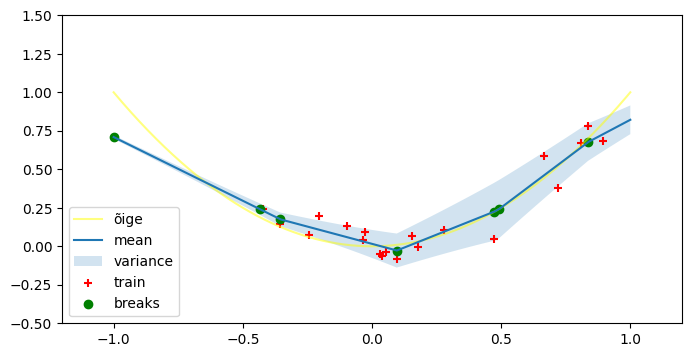

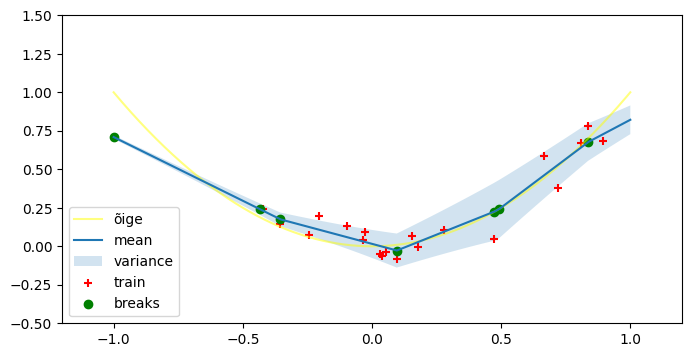

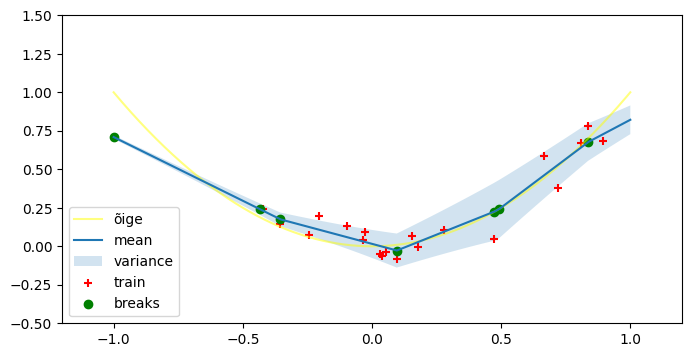

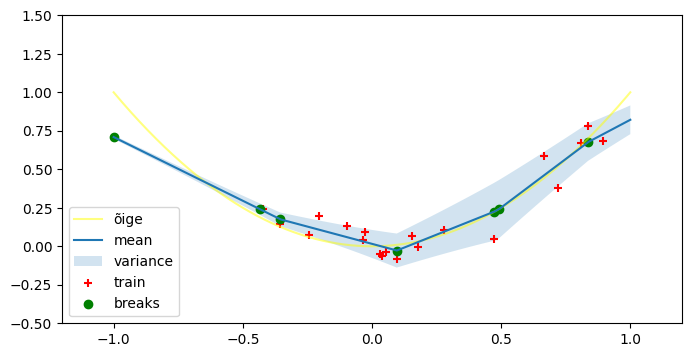

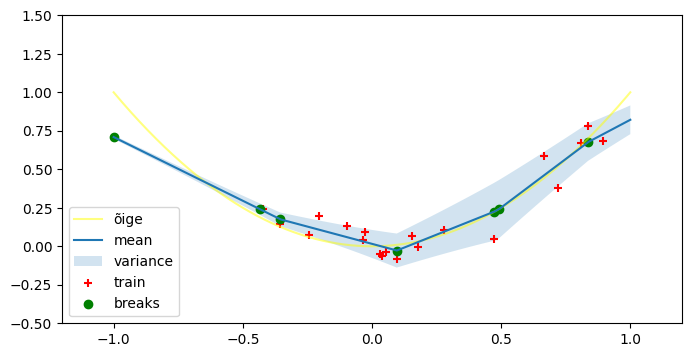

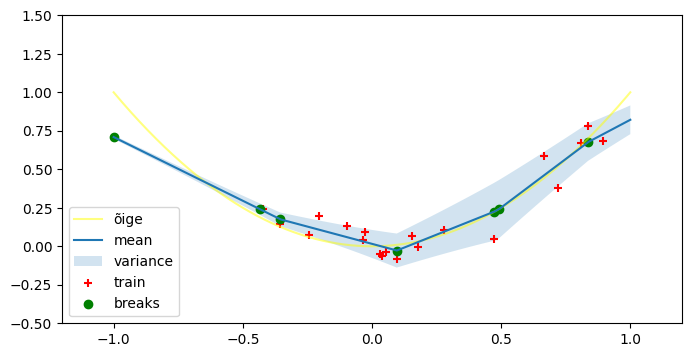

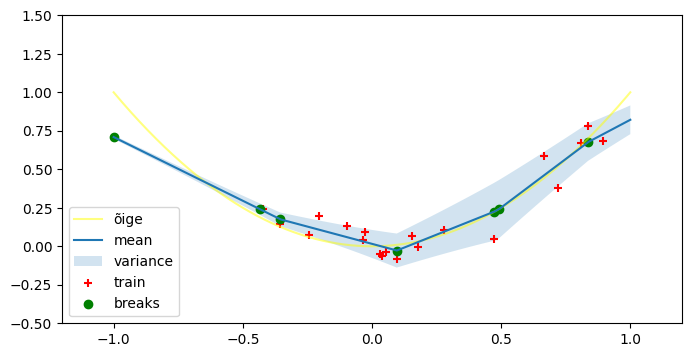

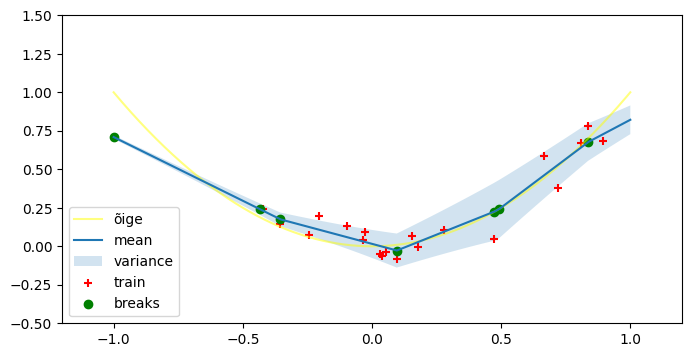

In [37]:
def jooksutan_mudeleid(seeds, *, train_data_rules=None, base_folder=None, **kwargs):
    kwargs = kwargs["kwargs"]
    
    if train_data_rules is None:
        raise Exception("train_data_rules is None")
    if base_folder is None:
        base_folder = datetime.today().strftime('%Y-%m-%d')
    
    if "starting_path" in kwargs:
        starting_path = kwargs["starting_path"]
        if not os.path.exists(starting_path):
            os.mkdir(starting_path)
    else:
        starting_path = "plots/"
    
    if "xlim" in kwargs:
        xlim = kwargs["xlim"]
    else:
        xlim = None
    if "ylim" in kwargs:
        ylim = kwargs["ylim"]
    else:
        ylim = None
    
    if "change_seeds" in kwargs:
        change_seeds = kwargs["change_seeds"]
    else:
        change_seeds = False #isinstance(seeds, range) or isinstance(seeds, list) or isinstance(seeds, tuple)
    
    if "sample_traindata" in kwargs:
        sample_traindata = kwargs["sample_traindata"]
    else:
        sample_traindata = False


    if os.path.exists(starting_path+base_folder) or os.path.exists(base_folder.split("_")[0]):
        #print("base_folder already exists")
        same_names = list(filter(lambda x: x.split("_")[0]==base_folder, os.listdir(starting_path, )))
        base_folder = starting_path + base_folder
        # same_names.sort()
        base_folder += "_" + str(len(same_names)+1)
        os.mkdir(base_folder)
    else:
        #print("lõime uue base")
        base_folder = starting_path + base_folder
        os.mkdir(base_folder)
    os.mkdir(base_folder + "/models")
    os.mkdir(base_folder + "/plots")
    # üleval pikk failide loomine, kõik mis oluline on *base_folder* on see kuhu salvestame asju

    if "fn" in kwargs:
        fn = kwargs["fn"]
    else:
        fn = lambda x: x**2

    infofail = ""
    if "selgitus" in kwargs:
        infofail += kwargs["selgitus"] + "\n\n"

    infofail += "traindata seed: " + str(seeds[0]) + "\n\n"
    infofail += "traindata geneti:\nmean, std, n_samples, noise_std\n" + \
        '\n'.join('({}, {}, {}, {})'.format(x[0],x[1],x[2],x[3]) for x in train_data_rules) + '\n\n'
    
    infofail += "seedid mida kasutasime: " + ", ".join('{}'.format(s) for s in seeds) + "\n"

    X, y = utils.train_data_maker(train_data_rules, fn=fn, seed=seeds[0])

    if change_seeds:
        for seed in seeds:
            model, history = treeni_stuff(seed, train_data=(X, y), **kwargs)

            #plt.clf()
            model_plot = utils.joonista_variance(model, np.linspace(-1, 1, 10000), X, y, ground_truth=fn, xlim=xlim, ylim=ylim, returnplt = True)
            model_plot.savefig(base_folder + f"/plots/seed{seed}.png")


            model.save(base_folder + f"/models/seed_{seed}")

    elif sample_traindata:
        for _ in range(kwargs["sample_iter"]):

            idxid = np.random.choice(len(X), kwargs["sample_size"], replace=False)
            X_train = X[idxid]
            y_train = y[idxid]
            
            model, history = treeni_stuff(seeds[0], train_data=(X_train, y_train), **kwargs)

            #plt.clf()
            model_plot = utils.joonista_variance(model, np.linspace(-1, 1, 10000), X_train, y_train, ground_truth=fn, xlim=xlim, ylim=ylim, returnplt = True)
            model_plot.savefig(base_folder + f"/plots/seed{seeds[0]}.png")


            model.save(base_folder + f"/models/seed_{seeds[0]}")
        


    with open(base_folder+"/info.txt", "w") as f:
        f.write(infofail)   

multiparams = {
    "starting_path": "test/",
    "epochs" : 1000, 
    "batch_size" : 8,
    "show_diagram" : False,
    "change_seeds": False,
    "sample_traindata": True,
    "sample_size": 20,
    "sample_iter": 10,
    "xlim":[-1.2, 1.2],
    "ylim":[-0.5, 1.5],
    "fn": lambda x: x**2,
}

utils.train_data_maker
rules = [(-0.4, 0.2, 10, 0.2),
    (-0.1, 0.1, 10, 0.1),
    (0.2, 0.1, 10, 0.1),
    (0.8, 0.2, 10, 0.2)]

jooksutan_mudeleid(range(10), train_data_rules=rules, kwargs=multiparams)


Epoch:   0 | Loss: 6.61200e-02
Epoch: 100 | Loss: -7.15457e-01
Epoch: 200 | Loss: -1.12603e+00
Epoch: 300 | Loss: -1.23098e+00
Epoch: 400 | Loss: -1.32245e+00
Epoch: 500 | Loss: -1.38604e+00
Epoch: 600 | Loss: -1.40210e+00
Epoch: 700 | Loss: -1.41243e+00
Epoch: 800 | Loss: -1.41759e+00
Epoch: 900 | Loss: -1.41876e+00
Epoch: 1000 | Loss: -1.42318e+00
Epoch: 1100 | Loss: -1.42660e+00
Epoch: 1200 | Loss: -1.42696e+00
Epoch: 1300 | Loss: -1.43034e+00
Epoch: 1400 | Loss: -1.43099e+00
Epoch: 1500 | Loss: -1.43465e+00
Epoch: 1600 | Loss: -1.43735e+00
Epoch: 1700 | Loss: -1.43700e+00
Epoch: 1800 | Loss: -1.43951e+00
Epoch: 1900 | Loss: -1.44170e+00
done seed0
313/313 [==============================] - 1s 3ms/step
model contains 7 breaks
313/313 [==============================] - 2s 5ms/step
INFO:tensorflow:Assets written to: test/2023-02-21_4/models/seed_0\assets
Epoch:   0 | Loss: 6.60753e-02
Epoch: 100 | Loss: -7.04553e-01
Epoch: 200 | Loss: -1.12371e+00
Epoch: 300 | Loss: -1.22492e+00
Epoch

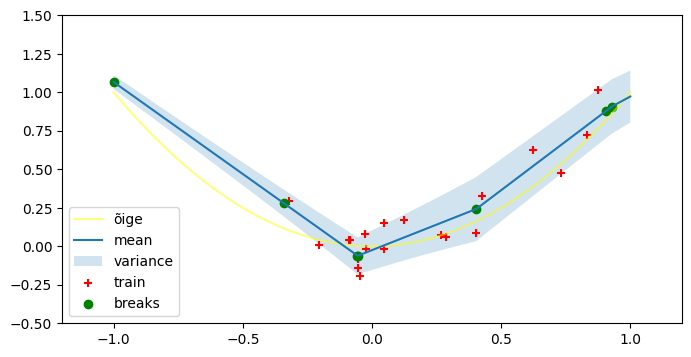

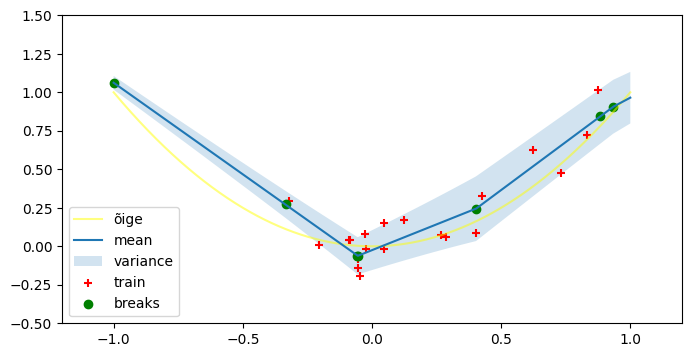

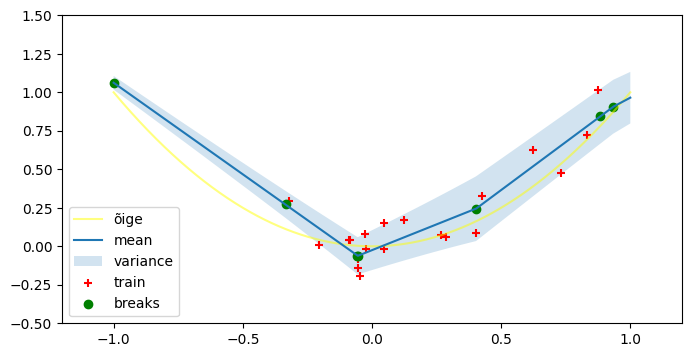

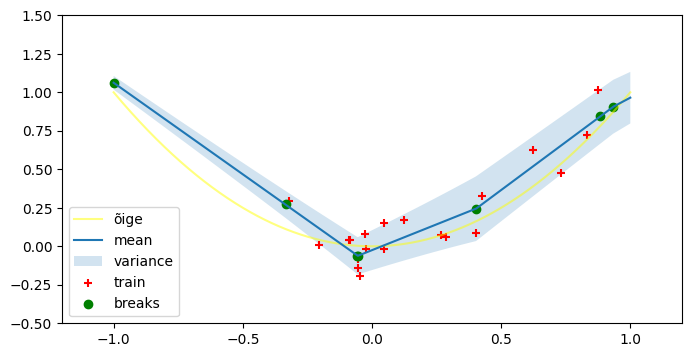

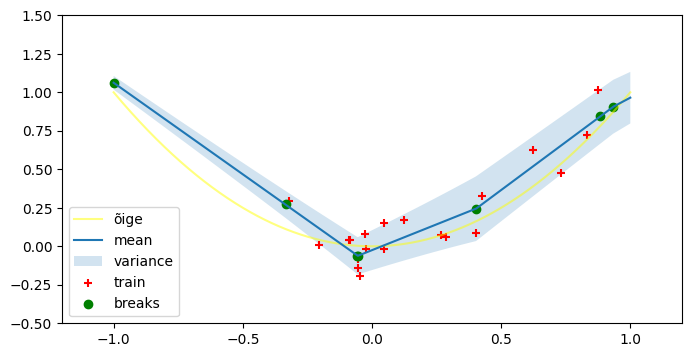

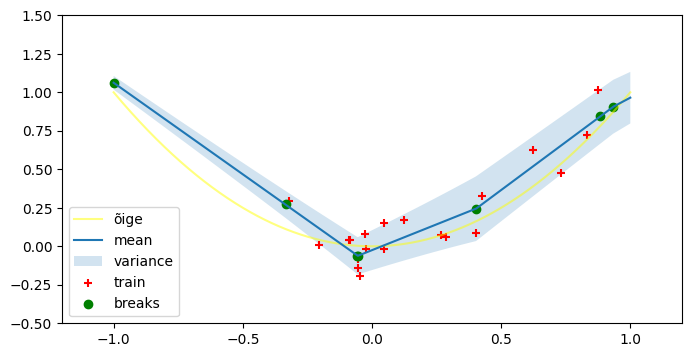

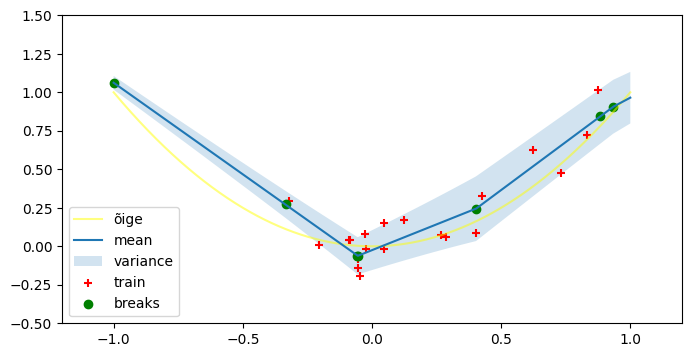

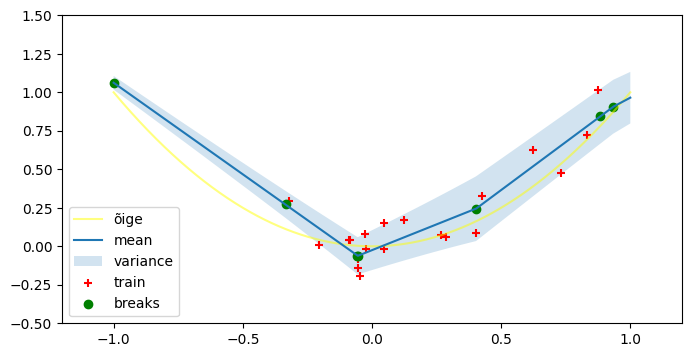

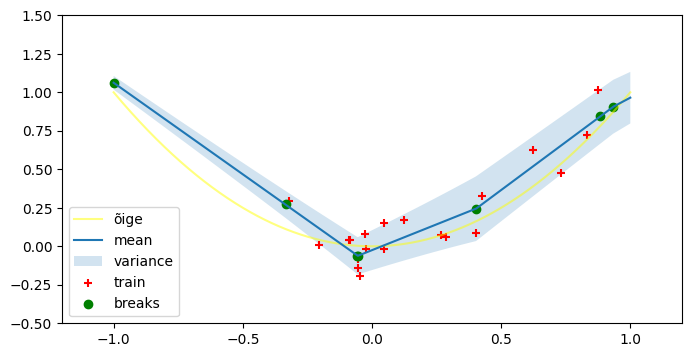

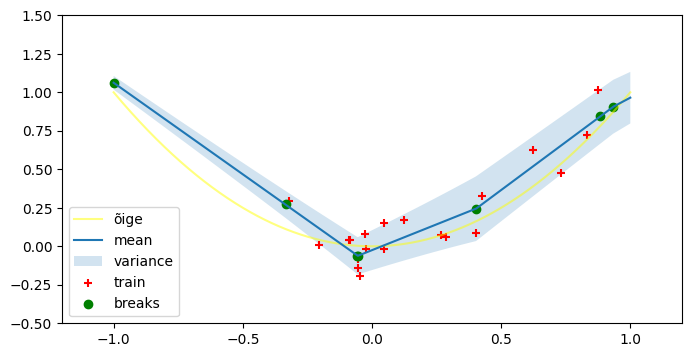

In [38]:
multiparams = {
    "selgitus": "Tavaline func, seedide muutmine",
    "starting_path": "test/",
    "epochs" : 2000, 
    "batch_size" : 8,
    "show_diagram" : False,
    "change_seeds": False,
    "sample_traindata": True,
    "sample_size": 20,
    "sample_iter": 10,
    "xlim":[-1.2, 1.2],
    "ylim":[-0.5, 1.5],
    "fn": lambda x: x**2,
}

utils.train_data_maker
rules = [(-0.4, 0.2, 5, 0.2),
    (-0.1, 0.1, 5, 0.1),
    (0.2, 0.1, 5, 0.1),
    (0.8, 0.2, 5, 0.2)]

jooksutan_mudeleid(range(10), train_data_rules=rules, kwargs=multiparams)

In [267]:
# rekmodel = keras.models.load_model('test/2023-02-15_9/model_seed3', custom_objects={"neg_log_likelihood": utils.neg_log_likelihood})

## TODO next time
- saada aru miks need kombopildid tulevad nii nagu tulevad
  - (see et on nad kõik üksteisepeal)
- 

## Mængimine

In [232]:
utils.reset_seeds(2002)

model = keras.Sequential([
    layers.Input(shape=(1,)),
    layers.Dense(units=5, activation='relu', name="layer_1", kernel_initializer=keras.initializers.RandomNormal(mean=1, stddev=0.01),),
    layers.Dense(units=5, activation='relu', name="layer_2", kernel_initializer=keras.initializers.RandomNormal(mean=1, stddev=0.01)),
    layers.Dense(units=2, activation='linear', name="layer_3")
])

fn = lambda x: 0.5*x**3 + 0.2*x**2
X, y = utils.train_data_maker(
    [(-0.0, 0.00, 100, 0.2)],
    # (-0.1, 0.1, 5, 0.1)],
    # (0.2, 0.1, 5, 0.1),
    # (0.8, 0.2, 5, 0.2)],
    fn=fn
)

X_train, y_train = X, y
X_valid, y_valid = np.linspace(-1, 1, 10000), fn(np.linspace(-1, 1, 10000))

o1 = keras.optimizers.Adam(learning_rate=0.0001, amsgrad=True, epsilon=0.01),
o2 = keras.optimizers.SGD(learning_rate=0.0001, momentum=0.99)
o3 = keras.optimizers.Adagrad(learning_rate=0.01, epsilon=0.01) # jüab sama -0.75.. kui adam
o4 = keras.optimizers.Adam(learning_rate=0.1, beta_1=0.85, beta_2=0.9, amsgrad=True, epsilon=0.001)
o5 = keras.optimizers.Adam(learning_rate=0.1, amsgrad=True, epsilon=0.001)


model.compile(
    optimizer=o5,
    loss=utils.neg_log_likelihood,
)

h = model.fit(X, y, batch_size=8, epochs=5000, verbose=0,
                callbacks=[CustomLogger(100)], shuffle=True)


plt.clf()
utils.joonista_variance(model, X_valid, X_train, y_train, xlim=(-0.1,0.1), ylim=(-1,1),
                        ground_truth=fn)

Epoch:   0 | Loss: -3.72887e-01
Epoch: 100 | Loss: -7.15460e-01
Epoch: 200 | Loss: -6.86915e-01
Epoch: 300 | Loss: -7.01241e-01
Epoch: 400 | Loss: -7.08110e-01
Epoch: 500 | Loss: -6.91418e-01


KeyboardInterrupt: 

In [269]:
# treeningandmete keskmine
np.mean(y_train)

0.016402594149567472

In [259]:
# treeningandmete rmse
np.sqrt(np.mean((y_train - 0.0164)**2))

0.2069333995039449

In [263]:
def find_rmse_estimate(model, X_train, y_train): # treeningandmetel mitte gridil
    X = X_train
    num = len(X)

    y_pred = model.predict(X)
    variance = np.exp(y_pred[:, 1:])

    # print(np.sum(variance)/num) 
    
    return np.sqrt(np.sum(variance)/num)

# rmse mida mudel annab
find_rmse_estimate(model, X_train, 1)

4/4 [==============================] - 0s 3ms/step


0.7667184857651181

In [212]:
y_pred = model.predict(X)
# log variance mida mudel annab
y_pred[:, 1:]

4/4 [==============================] - 0s 2ms/step


array([[-1.2283826],
       [-1.2283826],
       [-1.2283826],
       [-1.2283826],
       [-1.2283826],
       [-1.2283826],
       [-1.2283826],
       [-1.2283826],
       [-1.2283826],
       [-1.2283826],
       [-1.2283826],
       [-1.2283826],
       [-1.2283826],
       [-1.2283826],
       [-1.2283826],
       [-1.2283826],
       [-1.2283826],
       [-1.2283826],
       [-1.2283826],
       [-1.2283826],
       [-1.2283826],
       [-1.2283826],
       [-1.2283826],
       [-1.2283826],
       [-1.2283826],
       [-1.2283826],
       [-1.2283826],
       [-1.2283826],
       [-1.2283826],
       [-1.2283826],
       [-1.2283826],
       [-1.2283826],
       [-1.2283826],
       [-1.2283826],
       [-1.2283826],
       [-1.2283826],
       [-1.2283826],
       [-1.2283826],
       [-1.2283826],
       [-1.2283826],
       [-1.2283826],
       [-1.2283826],
       [-1.2283826],
       [-1.2283826],
       [-1.2283826],
       [-1.2283826],
       [-1.2283826],
       [-1.22

In [206]:
# variance mida mudel annab
np.exp(-1.23)

0.2922925776808594

In [207]:
-1.23 + ((y_train-0.016)**2)/-1.23

array([-1.33573504, -1.29629255, -1.28931089, -1.25572444, -1.28106726,
       -1.34294582, -1.23792389, -1.25226606, -1.34045318, -1.29378672,
       -1.33391438, -1.25219024, -1.25880994, -1.33891505, -1.23393842,
       -1.24697376, -1.25445938, -1.23179609, -1.23927612, -1.25306706,
       -1.2328575 , -1.27523532, -1.23154887, -1.2805196 , -1.24951074,
       -1.23171486, -1.23863035, -1.33179818, -1.24140856, -1.2334872 ,
       -1.2534913 , -1.23685886, -1.24850464, -1.23007546, -1.24666457,
       -1.24156854, -1.23801959, -1.23270296, -1.23324749, -1.27475035,
       -1.31028782, -1.2342004 , -1.2302443 , -1.24001821, -1.40250328,
       -1.25430324, -1.26205515, -1.26497245, -1.29336772, -1.23953866,
       -1.23071465, -1.316758  , -1.25212099, -1.2567197 , -1.23103562,
       -1.24797593, -1.26562428, -1.27375418, -1.2789977 , -1.23871992,
       -1.24086574, -1.34124451, -1.25458187, -1.23000185, -1.2854199 ,
       -1.24900002, -1.26794684, -1.31584979, -1.26992618, -1.23

In [257]:
-3.21 + ((y_train-0.016)**2)/-3.21
-3.76 + ((y_train-0.016)**2)/-3.76

array([-3.79458886, -3.78168613, -3.77940223, -3.76841518, -3.77670551,
       -3.7969477 , -3.76259212, -3.76728385, -3.79613229, -3.7808664 ,
       -3.79399327, -3.76725904, -3.76942453, -3.79562912, -3.76128837,
       -3.76555259, -3.76800134, -3.76058755, -3.76303448, -3.76754587,
       -3.76093477, -3.77479773, -3.76050668, -3.77652636, -3.7663825 ,
       -3.76056098, -3.76282323, -3.793301  , -3.76373205, -3.76114076,
       -3.76768465, -3.76224372, -3.76605338, -3.76002468, -3.76545144,
       -3.76378439, -3.76262343, -3.76088421, -3.76106234, -3.77463908,
       -3.78626437, -3.76137407, -3.76007992, -3.76327723, -3.81643059,
       -3.76795026, -3.77048613, -3.77144046, -3.78072934, -3.76312036,
       -3.76023378, -3.78838094, -3.76723639, -3.76874075, -3.76033878,
       -3.76588043, -3.77165369, -3.7743132 , -3.7760285 , -3.76285253,
       -3.76355448, -3.79639116, -3.76804141, -3.76000061, -3.77812938,
       -3.76621543, -3.77241346, -3.78808384, -3.77306096, -3.76

In [189]:
np.var(y_train)

0.04282143182352963

In [190]:
y_pred = model.predict(X)
variance = np.exp(y_pred[:, 1:])
variance

4/4 [==============================] - 0s 2ms/step


array([[0.97765106],
       [0.97765106],
       [0.97765106],
       [0.97765106],
       [0.97765106],
       [0.97765106],
       [0.97765106],
       [0.97765106],
       [0.97765106],
       [0.97765106],
       [0.97765106],
       [0.97765106],
       [0.97765106],
       [0.97765106],
       [0.97765106],
       [0.97765106],
       [0.97765106],
       [0.97765106],
       [0.97765106],
       [0.97765106],
       [0.97765106],
       [0.97765106],
       [0.97765106],
       [0.97765106],
       [0.97765106],
       [0.97765106],
       [0.97765106],
       [0.97765106],
       [0.97765106],
       [0.97765106],
       [0.97765106],
       [0.97765106],
       [0.97765106],
       [0.97765106],
       [0.97765106],
       [0.97765106],
       [0.97765106],
       [0.97765106],
       [0.97765106],
       [0.97765106],
       [0.97765106],
       [0.97765106],
       [0.97765106],
       [0.97765106],
       [0.97765106],
       [0.97765106],
       [0.97765106],
       [0.977

In [248]:
np.mean(y_train)

0.016402594149567472

In [224]:
y_train

array([ 0.37663014, -0.26955181, -0.254097  ,  0.19387934, -0.23462468,
        0.38872424, -0.0827238 , -0.14949096,  0.38458841,  0.29610296,
        0.37351179,  0.18120893, -0.17224514,  0.38201299, -0.05360067,
        0.16049128,  0.18945039, -0.03100202,  0.12281587,  0.18444133,
        0.07528511, -0.21988016,  0.05964763,  0.26527718, -0.13891357,
       -0.02992691, -0.08703071,  0.36985275,  0.13445895,  0.08149237,
       -0.15398321,  0.10784984, -0.13486653,  0.00636611, -0.12716922,
        0.13528666,  0.11531816, -0.04165975,  0.07920134, -0.2186123 ,
       -0.29825152,  0.08787834,  0.0333347 ,  0.12700629,  0.47662895,
        0.1888959 , -0.18256445,  0.22340326, -0.26318148, -0.09231692,
       -0.01364832,  0.34266854, -0.14895096, -0.16528771, -0.0196905 ,
       -0.13269566,  0.22532718, -0.2159863 , -0.22949373, -0.08756401,
       -0.09960649,  0.38590641,  0.18988416,  0.01751025, -0.2450871 ,
        0.1688726 , -0.20004307, -0.30895422,  0.23760596,  0.06

In [233]:
model.predict(X_train)

4/4 [==============================] - 0s 5ms/step


array([[ 0.02355664, -1.2184505 ],
       [ 0.02355664, -1.2184505 ],
       [ 0.02355664, -1.2184505 ],
       [ 0.02355664, -1.2184505 ],
       [ 0.02355664, -1.2184505 ],
       [ 0.02355664, -1.2184505 ],
       [ 0.02355664, -1.2184505 ],
       [ 0.02355664, -1.2184505 ],
       [ 0.02355664, -1.2184505 ],
       [ 0.02355664, -1.2184505 ],
       [ 0.02355664, -1.2184505 ],
       [ 0.02355664, -1.2184505 ],
       [ 0.02355664, -1.2184505 ],
       [ 0.02355664, -1.2184505 ],
       [ 0.02355664, -1.2184505 ],
       [ 0.02355664, -1.2184505 ],
       [ 0.02355664, -1.2184505 ],
       [ 0.02355664, -1.2184505 ],
       [ 0.02355664, -1.2184505 ],
       [ 0.02355664, -1.2184505 ],
       [ 0.02355664, -1.2184505 ],
       [ 0.02355664, -1.2184505 ],
       [ 0.02355664, -1.2184505 ],
       [ 0.02355664, -1.2184505 ],
       [ 0.02355664, -1.2184505 ],
       [ 0.02355664, -1.2184505 ],
       [ 0.02355664, -1.2184505 ],
       [ 0.02355664, -1.2184505 ],
       [ 0.02355664,

In [279]:
def find_rmse_estimate(model, X_train): # treeningandmetel mitte gridil
    X = X_train
    num = len(X)

    y_pred = model.predict(X)
    variance = np.exp(y_pred[:, 1:])

    return np.sqrt(np.sum(variance)/num)

find_rmse_estimate(model, X_train)

4/4 [==============================] - 0s 3ms/step


0.5537445047420176

Epoch:   0 | Loss: -3.56966e-01
Epoch: 100 | Loss: -7.20450e-01
Epoch: 200 | Loss: -6.88515e-01
Epoch: 300 | Loss: -7.01345e-01
Epoch: 400 | Loss: -7.08117e-01
Epoch: 500 | Loss: -6.91408e-01
Epoch: 600 | Loss: -7.09607e-01
Epoch: 700 | Loss: -6.42869e-01
Epoch: 800 | Loss: -6.84141e-01
Epoch: 900 | Loss: -7.11643e-01
4/4 [==============================] - 0s 2ms/step
RMSE antud mudelil antud andmetega on 0.5725809711349648
313/313 [==============================] - 1s 3ms/step
model contains 2 breaks
313/313 [==============================] - 1s 2ms/step


<Figure size 640x480 with 0 Axes>

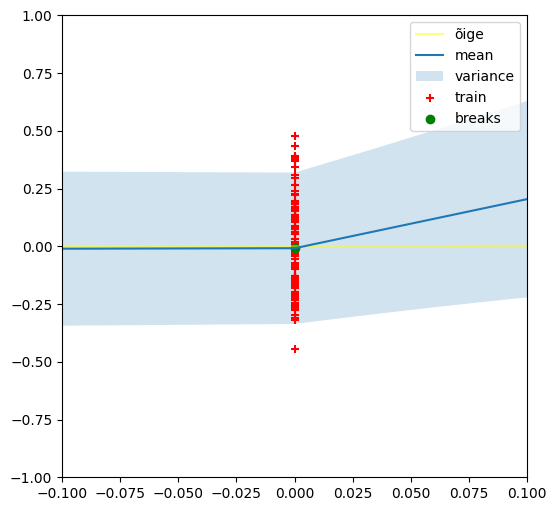

Epoch:   0 | Loss: -3.56966e-01
Epoch: 100 | Loss: -7.20450e-01
Epoch: 200 | Loss: -6.88515e-01
Epoch: 300 | Loss: -7.01345e-01
Epoch: 400 | Loss: -7.08117e-01
Epoch: 500 | Loss: -6.91408e-01
Epoch: 600 | Loss: -7.09607e-01
Epoch: 700 | Loss: -6.42869e-01
Epoch: 800 | Loss: -6.84141e-01
Epoch: 900 | Loss: -7.11643e-01
4/4 [==============================] - 0s 3ms/step
RMSE antud mudelil antud andmetega on 0.5725809711349648
313/313 [==============================] - 1s 2ms/step
model contains 2 breaks
313/313 [==============================] - 1s 2ms/step


<Figure size 640x480 with 0 Axes>

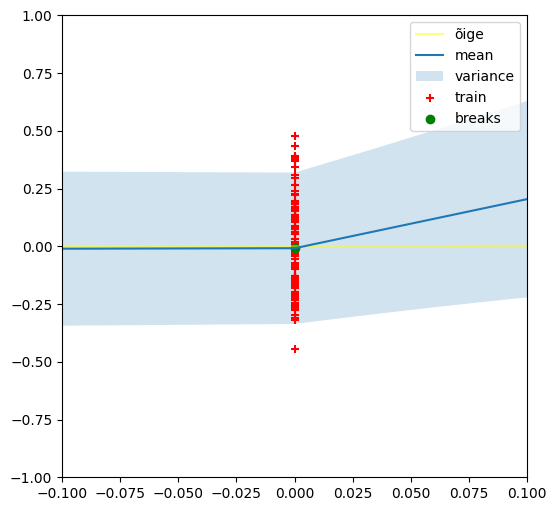

Epoch:   0 | Loss: -3.56966e-01
Epoch: 100 | Loss: -7.20450e-01
Epoch: 200 | Loss: -6.88515e-01
Epoch: 300 | Loss: -7.01345e-01
Epoch: 400 | Loss: -7.08117e-01
Epoch: 500 | Loss: -6.91408e-01
Epoch: 600 | Loss: -7.09607e-01
Epoch: 700 | Loss: -6.42869e-01
Epoch: 800 | Loss: -6.84141e-01
Epoch: 900 | Loss: -7.11643e-01
4/4 [==============================] - 0s 2ms/step
RMSE antud mudelil antud andmetega on 0.5725809711349648
313/313 [==============================] - 1s 2ms/step
model contains 2 breaks
313/313 [==============================] - 1s 2ms/step


<Figure size 640x480 with 0 Axes>

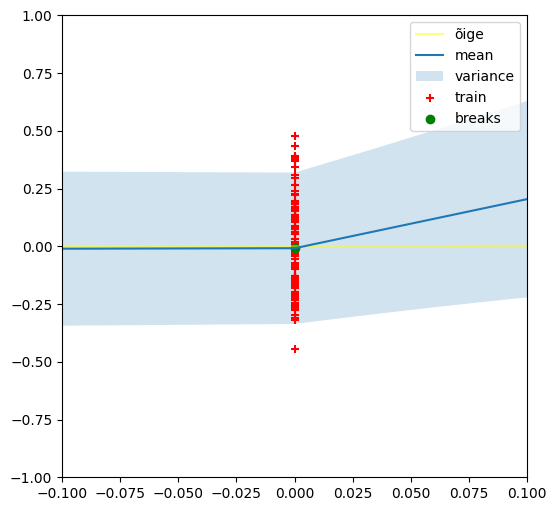

Epoch:   0 | Loss: -3.56966e-01
Epoch: 100 | Loss: -7.20450e-01
Epoch: 200 | Loss: -6.88515e-01
Epoch: 300 | Loss: -7.01345e-01
Epoch: 400 | Loss: -7.08117e-01
Epoch: 500 | Loss: -6.91408e-01
Epoch: 600 | Loss: -7.09607e-01
Epoch: 700 | Loss: -6.42869e-01
Epoch: 800 | Loss: -6.84141e-01
Epoch: 900 | Loss: -7.11643e-01
4/4 [==============================] - 0s 3ms/step
RMSE antud mudelil antud andmetega on 0.5725809711349648
313/313 [==============================] - 1s 2ms/step
model contains 2 breaks
313/313 [==============================] - 1s 4ms/step


<Figure size 640x480 with 0 Axes>

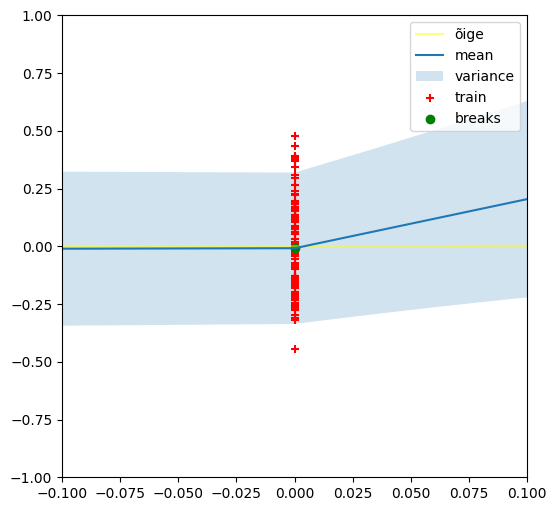

Epoch:   0 | Loss: -3.56966e-01
Epoch: 100 | Loss: -7.20450e-01
Epoch: 200 | Loss: -6.88515e-01
Epoch: 300 | Loss: -7.01345e-01
Epoch: 400 | Loss: -7.08117e-01
Epoch: 500 | Loss: -6.91408e-01
Epoch: 600 | Loss: -7.09607e-01
Epoch: 700 | Loss: -6.42869e-01
Epoch: 800 | Loss: -6.84141e-01
Epoch: 900 | Loss: -7.11643e-01
4/4 [==============================] - 0s 4ms/step
RMSE antud mudelil antud andmetega on 0.5725809711349648
313/313 [==============================] - 2s 5ms/step
model contains 2 breaks
313/313 [==============================] - 1s 4ms/step


<Figure size 640x480 with 0 Axes>

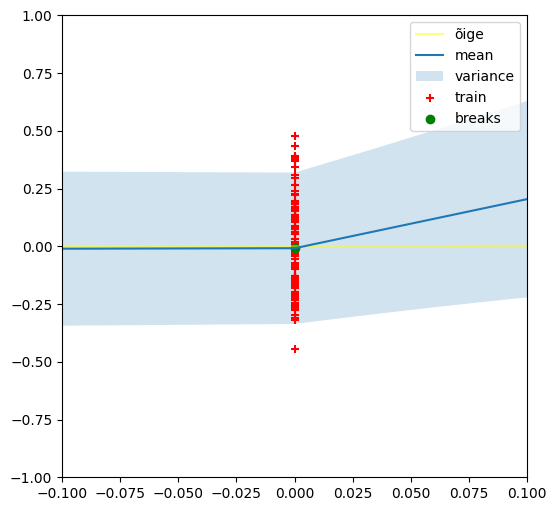

Epoch:   0 | Loss: -3.56966e-01
Epoch: 100 | Loss: -7.20450e-01
Epoch: 200 | Loss: -6.88515e-01
Epoch: 300 | Loss: -7.01345e-01
Epoch: 400 | Loss: -7.08117e-01
Epoch: 500 | Loss: -6.91408e-01
Epoch: 600 | Loss: -7.09607e-01
Epoch: 700 | Loss: -6.42869e-01
Epoch: 800 | Loss: -6.84141e-01
Epoch: 900 | Loss: -7.11643e-01
4/4 [==============================] - 0s 3ms/step
RMSE antud mudelil antud andmetega on 0.5725809711349648
313/313 [==============================] - 1s 2ms/step
model contains 2 breaks
313/313 [==============================] - 1s 4ms/step


<Figure size 640x480 with 0 Axes>

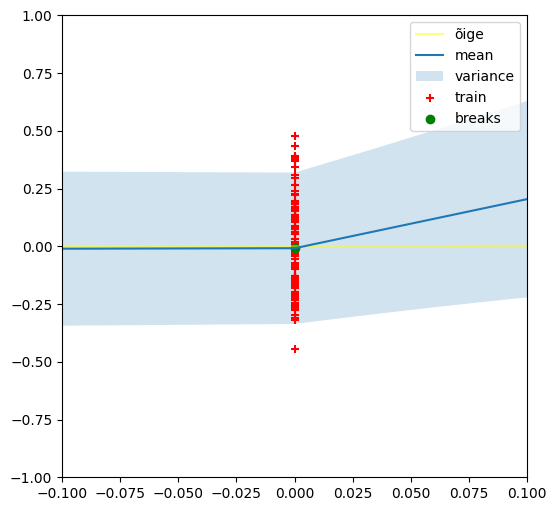

Epoch:   0 | Loss: -3.56966e-01
Epoch: 100 | Loss: -7.20450e-01
Epoch: 200 | Loss: -6.88515e-01
Epoch: 300 | Loss: -7.01345e-01
Epoch: 400 | Loss: -7.08117e-01
Epoch: 500 | Loss: -6.91408e-01
Epoch: 600 | Loss: -7.09607e-01
Epoch: 700 | Loss: -6.42869e-01
Epoch: 800 | Loss: -6.84141e-01
Epoch: 900 | Loss: -7.11643e-01
4/4 [==============================] - 0s 3ms/step
RMSE antud mudelil antud andmetega on 0.5725809711349648
313/313 [==============================] - 2s 4ms/step
model contains 2 breaks
313/313 [==============================] - 1s 2ms/step


<Figure size 640x480 with 0 Axes>

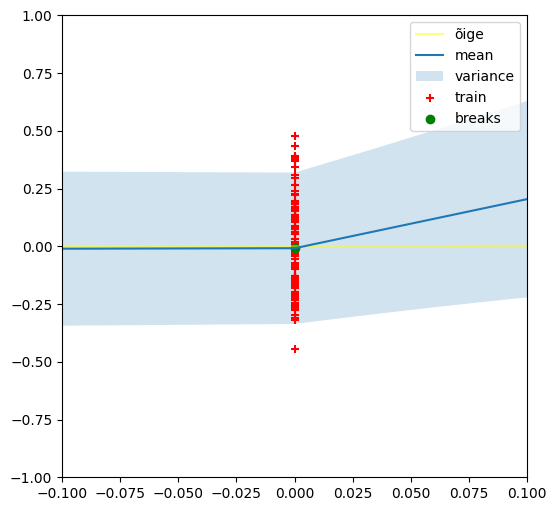

In [280]:
def otsi_lr(lrs):
    for lr in lrs:
        utils.reset_seeds(2002)

        model = keras.Sequential([
            layers.Input(shape=(1,)),
            layers.Dense(units=5, activation='relu', name="layer_1", kernel_initializer=keras.initializers.RandomNormal(mean=0, stddev=1),),
            layers.Dense(units=5, activation='relu', name="layer_2", kernel_initializer=keras.initializers.RandomNormal(mean=0, stddev=1)),
            layers.Dense(units=2, activation='linear', name="layer_3")
        ])

        fn = lambda x: 0.5*x**3 + 0.2*x**2
        X, y = utils.train_data_maker(
            [(0.0, 0.00, 100, 0.2)],
            # (-0.1, 0.1, 5, 0.1)],
            # (0.2, 0.1, 5, 0.1),
            # (0.8, 0.2, 5, 0.2)],
            fn=fn
        )

        X_train, y_train = X, y
        X_valid, y_valid = np.linspace(-1, 1, 10000), fn(np.linspace(-1, 1, 10000))

        o1 = keras.optimizers.experimental.Adam(learning_rate=lr, amsgrad=True,)# epsilon=0.01, use_ema=True, ema_momentum=0.5),



        model.compile(
            optimizer=o5,
            loss=utils.neg_log_likelihood,
        )

        h = model.fit(X, y, batch_size=8, epochs=1000, verbose=0,
                        callbacks=[CustomLogger(100)], shuffle=True)


        print(f"RMSE antud mudelil antud andmetega on {find_rmse_estimate(model, X_train)}")
        
        plt.clf()
        utils.joonista_variance(model, X_valid, X_train, y_train, xlim=(-0.1,0.1), ylim=(-1,1),
                                ground_truth=fn)

otsi_lr([0.5, 0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06])

Epoch:   0 | Loss: -3.69395e-01
Epoch: 100 | Loss: -6.60375e-01
Epoch: 200 | Loss: 1.92222e-01
Epoch: 300 | Loss: -5.91780e-01
Epoch: 400 | Loss: -6.39835e-01
Epoch: 500 | Loss: -6.58855e-01
Epoch: 600 | Loss: -6.34751e-01
Epoch: 700 | Loss: -4.93995e-01
Epoch: 800 | Loss: -6.15606e-01
Epoch: 900 | Loss: -6.35771e-01
4/4 [==============================] - 0s 4ms/step
RMSE antud mudelil antud andmetega on 0.4694280780795946
313/313 [==============================] - 1s 3ms/step
model contains 2 breaks
313/313 [==============================] - 1s 4ms/step


<Figure size 640x480 with 0 Axes>

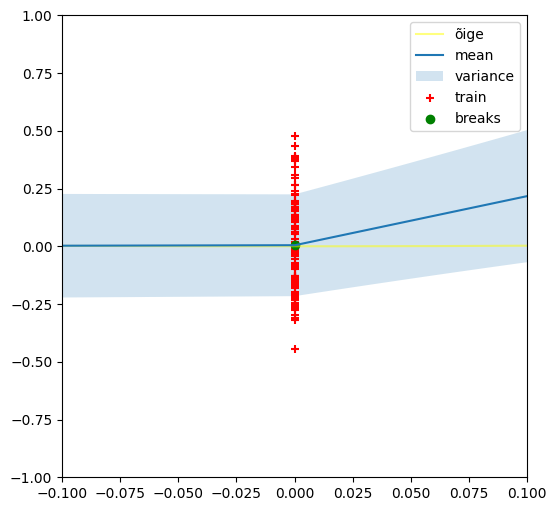

Epoch:   0 | Loss: -3.78745e-01
Epoch: 100 | Loss: -7.15471e-01
Epoch: 200 | Loss: -6.86817e-01
Epoch: 300 | Loss: -7.01168e-01
Epoch: 400 | Loss: -7.08108e-01
Epoch: 500 | Loss: -6.91360e-01
Epoch: 600 | Loss: -7.09569e-01
Epoch: 700 | Loss: -6.42649e-01
Epoch: 800 | Loss: -6.84115e-01
Epoch: 900 | Loss: -7.11640e-01
4/4 [==============================] - 0s 2ms/step
RMSE antud mudelil antud andmetega on 0.5726231751511764
313/313 [==============================] - 1s 2ms/step
model contains 2 breaks
313/313 [==============================] - 1s 2ms/step


<Figure size 640x480 with 0 Axes>

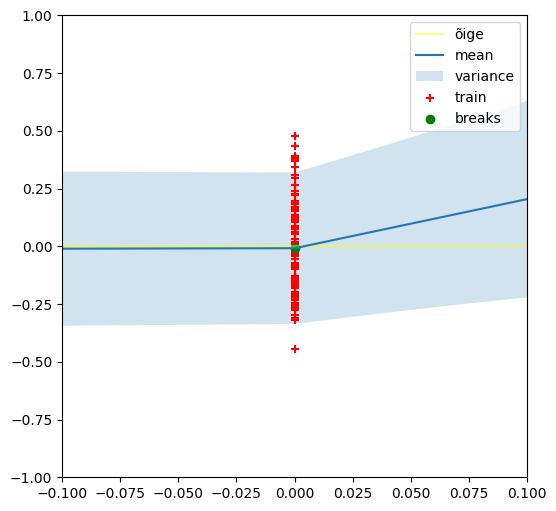

Epoch:   0 | Loss: -8.08099e-03
Epoch: 100 | Loss: -7.23160e-01
Epoch: 200 | Loss: -7.22470e-01
Epoch: 300 | Loss: -7.25454e-01
Epoch: 400 | Loss: -7.26246e-01
Epoch: 500 | Loss: -7.19575e-01
Epoch: 600 | Loss: -7.26824e-01
Epoch: 700 | Loss: -7.27101e-01
Epoch: 800 | Loss: -7.25643e-01
Epoch: 900 | Loss: -7.25106e-01
4/4 [==============================] - 0s 3ms/step
RMSE antud mudelil antud andmetega on 0.5443101299890004
313/313 [==============================] - 1s 2ms/step
model contains 2 breaks
313/313 [==============================] - 1s 2ms/step


<Figure size 640x480 with 0 Axes>

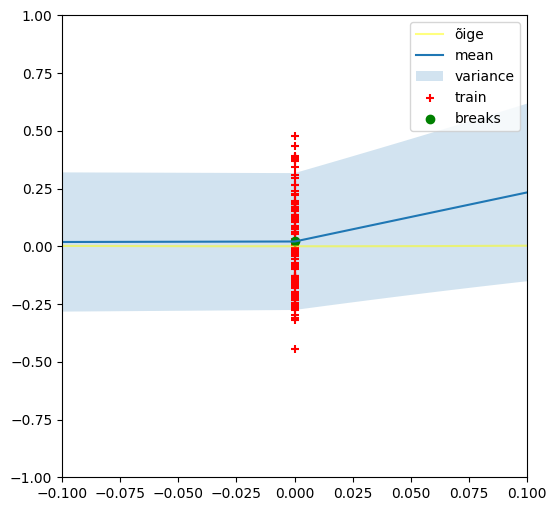

Epoch:   0 | Loss: 3.78486e-02
Epoch: 100 | Loss: -7.02195e-01
Epoch: 200 | Loss: -7.28305e-01
Epoch: 300 | Loss: -7.28590e-01
Epoch: 400 | Loss: -7.28529e-01
Epoch: 500 | Loss: -7.28073e-01
Epoch: 600 | Loss: -7.28543e-01
Epoch: 700 | Loss: -7.28637e-01
Epoch: 800 | Loss: -7.28220e-01
Epoch: 900 | Loss: -7.28437e-01
4/4 [==============================] - 0s 2ms/step
RMSE antud mudelil antud andmetega on 0.5406442098567331
313/313 [==============================] - 1s 2ms/step
model contains 2 breaks
313/313 [==============================] - 1s 2ms/step


<Figure size 640x480 with 0 Axes>

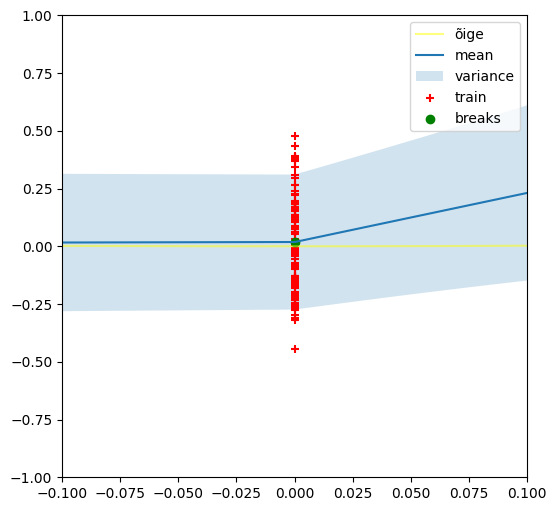

Epoch:   0 | Loss: 4.25646e-02
Epoch: 100 | Loss: -7.42188e-02
Epoch: 200 | Loss: -1.85756e-01
Epoch: 300 | Loss: -2.90981e-01
Epoch: 400 | Loss: -3.86521e-01
Epoch: 500 | Loss: -4.69641e-01
Epoch: 600 | Loss: -5.39299e-01
Epoch: 700 | Loss: -5.94999e-01
Epoch: 800 | Loss: -6.37649e-01
Epoch: 900 | Loss: -6.68907e-01
4/4 [==============================] - 0s 3ms/step
RMSE antud mudelil antud andmetega on 0.6004071126050217
313/313 [==============================] - 2s 5ms/step
model contains 2 breaks
313/313 [==============================] - 1s 2ms/step


<Figure size 640x480 with 0 Axes>

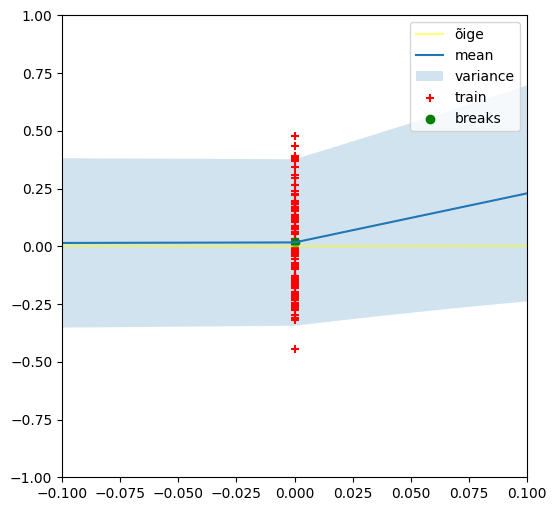

Epoch:   0 | Loss: 4.30379e-02
Epoch: 100 | Loss: 3.11080e-02
Epoch: 200 | Loss: 1.92328e-02
Epoch: 300 | Loss: 7.41044e-03
Epoch: 400 | Loss: -4.36569e-03
Epoch: 500 | Loss: -1.60986e-02
Epoch: 600 | Loss: -2.77774e-02
Epoch: 700 | Loss: -3.93821e-02
Epoch: 800 | Loss: -5.09162e-02
Epoch: 900 | Loss: -6.23806e-02
4/4 [==============================] - 0s 2ms/step
RMSE antud mudelil antud andmetega on 0.9374506416043118
313/313 [==============================] - 1s 2ms/step
model contains 2 breaks
313/313 [==============================] - 1s 2ms/step


<Figure size 640x480 with 0 Axes>

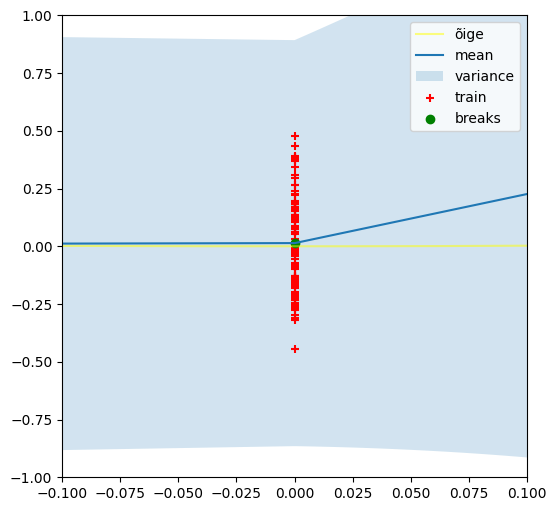

Epoch:   0 | Loss: 4.30852e-02
Epoch: 100 | Loss: 4.18894e-02
Epoch: 200 | Loss: 4.06938e-02
Epoch: 300 | Loss: 3.94991e-02
Epoch: 400 | Loss: 3.83051e-02
Epoch: 500 | Loss: 3.71113e-02
Epoch: 600 | Loss: 3.59179e-02
Epoch: 700 | Loss: 3.47261e-02
Epoch: 800 | Loss: 3.35349e-02
Epoch: 900 | Loss: 3.23445e-02
4/4 [==============================] - 0s 2ms/step
RMSE antud mudelil antud andmetega on 0.9935285597422137
313/313 [==============================] - 1s 2ms/step
model contains 2 breaks
313/313 [==============================] - 1s 2ms/step


<Figure size 640x480 with 0 Axes>

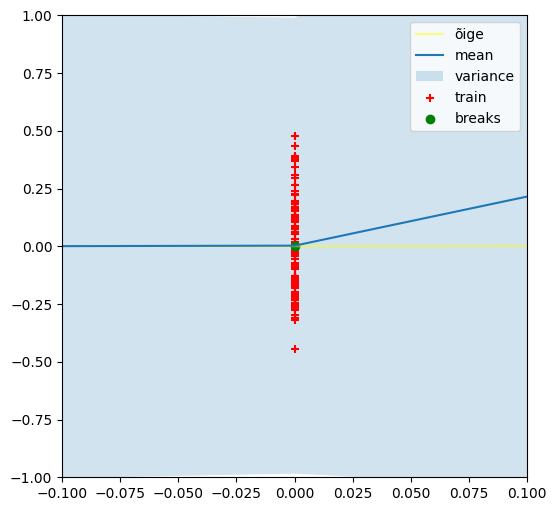

In [316]:
def otsi_lr(lrs):
    for lr in lrs:
        utils.reset_seeds(2002)

        model = keras.Sequential([
            layers.Input(shape=(1,)),
            layers.Dense(units=5, activation='relu', name="layer_1", kernel_initializer=keras.initializers.RandomNormal(mean=0, stddev=1),),
            layers.Dense(units=5, activation='relu', name="layer_2", kernel_initializer=keras.initializers.RandomNormal(mean=0, stddev=1)),
            layers.Dense(units=2, activation='linear', name="layer_3")
        ])

        fn = lambda x: 0.5*x**3 + 0.2*x**2
        X, y = utils.train_data_maker(
            [(0.0, 0.00, 100, 0.2)],
            # (-0.1, 0.1, 5, 0.1)],
            # (0.2, 0.1, 5, 0.1),
            # (0.8, 0.2, 5, 0.2)],
            fn=fn
        )

        X_train, y_train = X, y
        X_valid, y_valid = np.linspace(-1, 1, 10000), fn(np.linspace(-1, 1, 10000))

        o1 = keras.optimizers.experimental.Adam(learning_rate=lr, amsgrad=True,)# epsilon=0.01, use_ema=True, ema_momentum=0.5),


        model.compile(
            optimizer=o1,
            loss=utils.neg_log_likelihood,
        )

        h = model.fit(X, y, batch_size=8, epochs=1000, verbose=0,
                        callbacks=[CustomLogger(100)], shuffle=True)


        print(f"RMSE antud mudelil antud andmetega {lr} on {find_rmse_estimate(model, X_train)}")
        
        plt.clf()
        utils.joonista_variance(model, X_valid, X_train, y_train, xlim=(-0.1,0.1), ylim=(-1,1),
                                ground_truth=fn)

otsi_lr([0.5, 0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06])

Epoch:   0 | Loss: -3.69395e-01
4/4 [==============================] - 0s 2ms/step
RMSE antud mudelil antud andmetega peale 0epoch on 0.6163681579346248
Epoch:   0 | Loss: -6.12526e-01
4/4 [==============================] - 0s 3ms/step
RMSE antud mudelil antud andmetega peale 100epoch on 0.612364835811685
Epoch:   0 | Loss: -6.26227e-01
4/4 [==============================] - 0s 3ms/step
RMSE antud mudelil antud andmetega peale 200epoch on 0.6124088453076385
Epoch:   0 | Loss: -6.26827e-01
4/4 [==============================] - 0s 3ms/step
RMSE antud mudelil antud andmetega peale 300epoch on 0.6196958768108177
Epoch:   0 | Loss: -6.17652e-01
4/4 [==============================] - 0s 3ms/step
RMSE antud mudelil antud andmetega peale 400epoch on 0.6154929702072248
Epoch:   0 | Loss: -6.23049e-01
4/4 [==============================] - 0s 3ms/step
RMSE antud mudelil antud andmetega peale 500epoch on 0.614729331396271
Epoch:   0 | Loss: -6.24050e-01
4/4 [==============================] - 0s 

<Figure size 640x480 with 0 Axes>

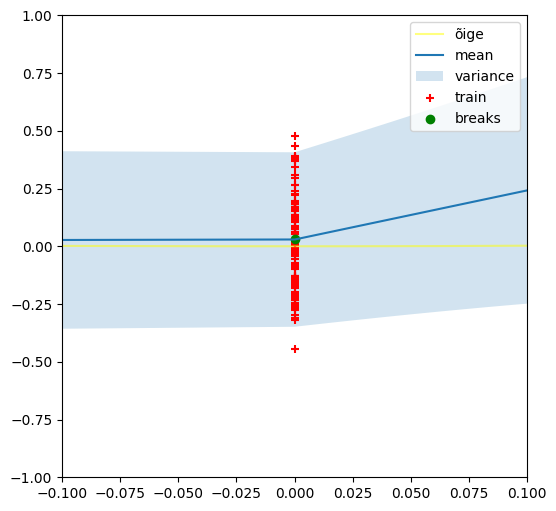

In [318]:
lr = 0.5
utils.reset_seeds(2002)

model = keras.Sequential([
    layers.Input(shape=(1,)),
    layers.Dense(units=5, activation='relu', name="layer_1",
                 kernel_initializer=keras.initializers.RandomNormal(mean=0, stddev=1),),
    layers.Dense(units=5, activation='relu', name="layer_2",
                 kernel_initializer=keras.initializers.RandomNormal(mean=0, stddev=1)),
    layers.Dense(units=2, activation='linear', name="layer_3")
])


def fn(x): return 0.5*x**3 + 0.2*x**2


X, y = utils.train_data_maker(
    [(0.0, 0.00, 100, 0.2)],
    # (-0.1, 0.1, 5, 0.1)],
    # (0.2, 0.1, 5, 0.1),
    # (0.8, 0.2, 5, 0.2)],
    fn=fn
)

X_train, y_train = X, y
X_valid, y_valid = np.linspace(-1, 1, 10000), fn(np.linspace(-1, 1, 10000))

# epsilon=0.01, use_ema=True, ema_momentum=0.5),
o1 = keras.optimizers.experimental.Adam(learning_rate=lr, amsgrad=True,)

model.compile(
    optimizer=o1,
    loss=utils.neg_log_likelihood,
)

for i in range(20):
    h = model.fit(X, y, batch_size=8, epochs=100, verbose=0,
              callbacks=[CustomLogger(100)], shuffle=True)
    print(
    f"RMSE antud mudelil antud andmetega peale {i*100} epoch on {find_rmse_estimate(model, X_train)}")

plt.clf()
utils.joonista_variance(model, X_valid, X_train, y_train, xlim=(-0.1, 0.1), ylim=(-1, 1),
                        ground_truth=fn)




Epoch:   0 | Loss: 5.14588e-03
Epoch: 100 | Loss: -1.11585e+00
Epoch: 200 | Loss: -1.41819e+00
Epoch: 300 | Loss: -1.42156e+00
Epoch: 400 | Loss: -1.42150e+00
Epoch: 500 | Loss: -1.42050e+00
Epoch: 600 | Loss: -1.42151e+00
Epoch: 700 | Loss: -1.42167e+00
Epoch: 800 | Loss: -1.42088e+00
Epoch: 900 | Loss: -1.42129e+00
4/4 [==============================] - 0s 4ms/step
RMSE antud mudelil antud andmetega peale 1000 epoch on 0.38235537269302455
313/313 [==============================] - 1s 3ms/step
model contains 2 breaks
313/313 [==============================] - 1s 3ms/step


<Figure size 640x480 with 0 Axes>

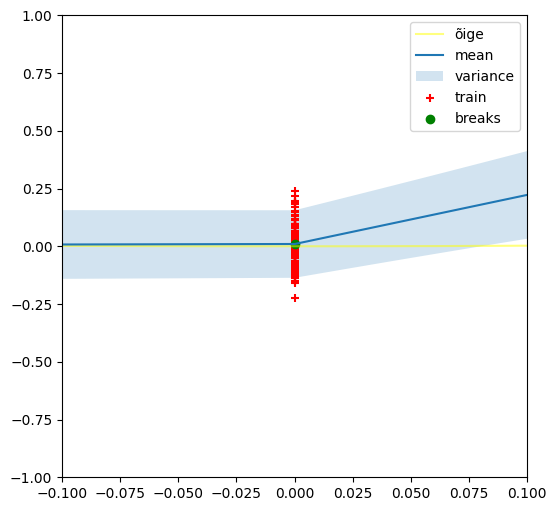

In [410]:
lr = 0.5
utils.reset_seeds(2002)

model = keras.Sequential([
    layers.Input(shape=(1,)),
    layers.Dense(units=5, activation='relu', name="layer_1",
                 kernel_initializer=keras.initializers.RandomNormal(mean=0, stddev=1),),
    layers.Dense(units=5, activation='relu', name="layer_2",
                 kernel_initializer=keras.initializers.RandomNormal(mean=0, stddev=1)),
    layers.Dense(units=2, activation='linear', name="layer_3")
])


def fn(x): return 0.5*x**3 + 0.2*x**2


X, y = utils.train_data_maker(
    [(0.0, 0.00, 100, 0.1)],
    # (-0.1, 0.1, 5, 0.1)],
    # (0.2, 0.1, 5, 0.1),
    # (0.8, 0.2, 5, 0.2)],
    fn=fn
)

X_train, y_train = X, y
X_valid, y_valid = np.linspace(-1, 1, 10000), fn(np.linspace(-1, 1, 10000))

# epsilon=0.01, use_ema=True, ema_momentum=0.5),
o1 = keras.optimizers.experimental.Adam(learning_rate=0.5, amsgrad=True,clipvalue=0.5)
o2 = keras.optimizers.experimental.Adam(learning_rate=0.001, amsgrad=True,)


model.compile(
    optimizer=o2,
    loss=utils.neg_log_likelihood,
    #metrics=[find_rmse_estimate(model, X_train)],
)

h = model.fit(X, y, batch_size=8, epochs=1000, verbose=0,
              callbacks=[CustomLogger(100)], shuffle=True)
print(    f"RMSE antud mudelil antud andmetega peale {1000} epoch on {find_rmse_estimate(model, X_train)}")


# model.compile(
#     optimizer=o2,
#     loss=utils.neg_log_likelihood,
# )

# h = model.fit(X, y, batch_size=8, epochs=1000, verbose=0,
#                 callbacks=[CustomLogger(100)], shuffle=True)
# print(    f"RMSE antud mudelil antud andmetega peale 1000+1000 epoch on {find_rmse_estimate(model, X_train)}")

plt.clf()
utils.joonista_variance(model, X_valid, X_train, y_train, xlim=(-0.1, 0.1), ylim=(-1, 1),
                        ground_truth=fn)


In [411]:
model.predict(X_train)

4/4 [==============================] - 0s 3ms/step


array([[ 0.00970639, -1.9228097 ],
       [ 0.00970639, -1.9228097 ],
       [ 0.00970639, -1.9228097 ],
       [ 0.00970639, -1.9228097 ],
       [ 0.00970639, -1.9228097 ],
       [ 0.00970639, -1.9228097 ],
       [ 0.00970639, -1.9228097 ],
       [ 0.00970639, -1.9228097 ],
       [ 0.00970639, -1.9228097 ],
       [ 0.00970639, -1.9228097 ],
       [ 0.00970639, -1.9228097 ],
       [ 0.00970639, -1.9228097 ],
       [ 0.00970639, -1.9228097 ],
       [ 0.00970639, -1.9228097 ],
       [ 0.00970639, -1.9228097 ],
       [ 0.00970639, -1.9228097 ],
       [ 0.00970639, -1.9228097 ],
       [ 0.00970639, -1.9228097 ],
       [ 0.00970639, -1.9228097 ],
       [ 0.00970639, -1.9228097 ],
       [ 0.00970639, -1.9228097 ],
       [ 0.00970639, -1.9228097 ],
       [ 0.00970639, -1.9228097 ],
       [ 0.00970639, -1.9228097 ],
       [ 0.00970639, -1.9228097 ],
       [ 0.00970639, -1.9228097 ],
       [ 0.00970639, -1.9228097 ],
       [ 0.00970639, -1.9228097 ],
       [ 0.00970639,

In [412]:
_, y_train = utils.train_data_maker(
    [(0.0, 0.00, 100, 0.1)],
    fn=fn
)
np.exp(-1.9228097) / np.var(y_train)

13.656303628311175

In [409]:
_, y_train = utils.train_data_maker(
    [(0.0, 0.00, 100, 0.2)],
    fn=fn
)
np.exp(-1.2299876) / np.var(y_train)

6.82593247549192

In [405]:
_, y_train = utils.train_data_maker(
    [(0.0, 0.00, 100, 0.3)],
    fn=fn
)
np.exp(-0.82459116) / np.var(y_train)

4.550309178476796

In [404]:
_, y_train = utils.train_data_maker(
    [(0.0, 0.00, 100, 0.4)],
    fn=fn
)
np.exp(-0.536934) / np.var(y_train)

3.412646865398113

In [398]:
_, y_train = utils.train_data_maker(
    [(0.0, 0.00, 100, 0.5)],
    fn=fn
)
np.exp(-0.31382188) / np.var(y_train)

2.7300316824863247

In [418]:
vars = []
for _ in range(1000):
    vars.append(np.var(np.random.choice(y_train, 8, replace=False)))
np.mean(vars)

0.009502824445831563

In [422]:
model.predict(X_train)

4/4 [==============================] - 0s 3ms/step


array([[ 0.00970639, -1.9228097 ],
       [ 0.00970639, -1.9228097 ],
       [ 0.00970639, -1.9228097 ],
       [ 0.00970639, -1.9228097 ],
       [ 0.00970639, -1.9228097 ],
       [ 0.00970639, -1.9228097 ],
       [ 0.00970639, -1.9228097 ],
       [ 0.00970639, -1.9228097 ],
       [ 0.00970639, -1.9228097 ],
       [ 0.00970639, -1.9228097 ],
       [ 0.00970639, -1.9228097 ],
       [ 0.00970639, -1.9228097 ],
       [ 0.00970639, -1.9228097 ],
       [ 0.00970639, -1.9228097 ],
       [ 0.00970639, -1.9228097 ],
       [ 0.00970639, -1.9228097 ],
       [ 0.00970639, -1.9228097 ],
       [ 0.00970639, -1.9228097 ],
       [ 0.00970639, -1.9228097 ],
       [ 0.00970639, -1.9228097 ],
       [ 0.00970639, -1.9228097 ],
       [ 0.00970639, -1.9228097 ],
       [ 0.00970639, -1.9228097 ],
       [ 0.00970639, -1.9228097 ],
       [ 0.00970639, -1.9228097 ],
       [ 0.00970639, -1.9228097 ],
       [ 0.00970639, -1.9228097 ],
       [ 0.00970639, -1.9228097 ],
       [ 0.00970639,

2.592853186286453 1.1756756756756754
1.8000921136411363


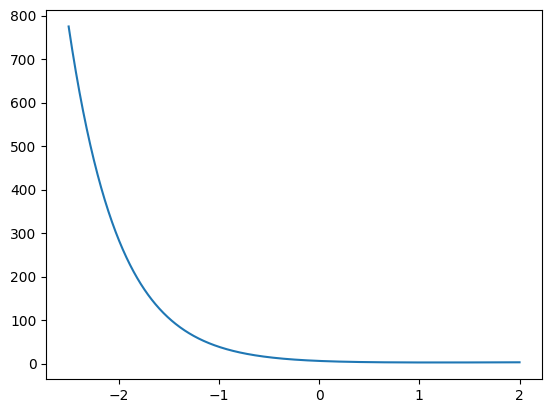

In [457]:
tul = []
y_train = np.random.normal(0, 0.1, 1000)


for i in np.linspace(-2.5, 2, 1000):
    tul.append(utils.neg_log_likelihood2(y_train, np.asarray([[0, i] for _ in range(1000)])))
plt.plot(np.linspace(-2.5, 2, 1000), tul)
print(np.min(tul), np.linspace(-2.5, 2, 1000)[np.argmin(tul)]) # np.argmin(tul),
print(np.exp(np.linspace(-2.5, 2, 1000)[np.argmin(tul)])**0.5 )# hinnatud variance

In [434]:
y_train

array([ 2.10811673e-01, -7.04817125e-03,  1.56222529e-01,  9.31433313e-02,
       -1.69342331e-01, -1.27565281e-01,  3.63525735e-01, -6.28299381e-02,
       -4.01150312e-01,  1.01982237e-01, -1.14460939e-01, -5.13467671e-02,
        3.24437668e-01,  6.50875997e-02,  4.60393147e-02, -4.38428790e-01,
       -2.99408388e-01, -2.27577258e-02,  1.46080556e-01, -4.80173442e-01,
       -1.55397160e-01, -2.01129381e-01,  9.53284190e-02,  2.03437013e-01,
       -2.17451894e-01, -2.43430490e-01,  2.75631788e-01, -3.95559192e-01,
        1.18218745e-02, -3.49671030e-01,  1.82138280e-01, -2.83932580e-02,
        9.38474598e-02,  1.77653886e-01,  3.47522440e-02,  2.34024124e-02,
       -1.81769357e-01,  2.44382711e-01, -1.35403227e-01, -4.53092694e-02,
       -1.62258427e-01, -4.34609277e-02,  2.66413751e-01, -6.12774574e-02,
       -1.80921873e-01, -1.82939282e-03, -2.01095309e-01,  1.51742573e-02,
       -2.34789348e-01, -3.17899352e-01, -2.32670066e-01, -2.22209337e-01,
       -1.20934924e-01, -

In [ ]:
# variance mida mudel annab
np.exp(-1.23)

0.2922925776808594

miks mean on 0.016